#**Image Classification Using TripletLoss + Cross Entropy for Lensless Images**

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!mkdir dataset

##Data loading

In [3]:
!unzip "/content/drive/MyDrive/lensless_dataset.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000192.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000273.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000291.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000377.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000460.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000462.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000504.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000668.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000669.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000822.jpeg  
  inflating: /content/dataset/lensless_cifar10/test-walking_horse_s_000840.jpeg  
  inflating: /content/dataset/lensless_cifar10/

In [4]:
import pandas as pd

# Set the file path
file_path = '/content/drive/MyDrive/Thesis_model/train_dataframe.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [5]:
df_train = df.sample(frac=0.8)

In [6]:
df_val = df.drop(df_train.index)

In [7]:
import pandas as pd

# Set the file path
test_file_path = '/content/drive/MyDrive/Thesis_model/test_dataframe.csv'

# Load the CSV file into a pandas DataFrame
df_test = pd.read_csv(test_file_path)

In [8]:
df_train

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
26547,lapdog_s_000708.jpeg,lapdog_s_000708.png,lapdog_s_000710.png,bufo_americanus_s_000956.png,5,dog
27885,peke_s_000548.jpeg,peke_s_000548.png,peke_s_000552.png,fireboat_s_000011.png,5,dog
27263,maltese_s_001981.jpeg,maltese_s_001981.png,maltese_s_001982.png,boat_s_002801.png,5,dog
14242,sparrow_s_002155.jpeg,sparrow_s_002155.png,sparrow_s_002178.png,camion_s_002094.png,2,bird
20582,capreolus_capreolus_s_000765.jpeg,capreolus_capreolus_s_000765.png,capreolus_capreolus_s_000767.png,tractor_trailer_s_001861.png,4,deer
...,...,...,...,...,...,...
14896,wagtail_s_002049.jpeg,wagtail_s_002049.png,wagtail_s_002067.png,maltese_s_000569.png,2,bird
4907,twinjet_s_001215.jpeg,twinjet_s_001215.png,twinjet_s_001227.png,arabian_s_001984.png,0,airplane
12855,nandu_s_002105.jpeg,nandu_s_002105.png,nandu_s_002128.png,mongrel_s_002570.png,2,bird
28632,pekingese_s_001387.jpeg,pekingese_s_001387.png,pekingese_s_001389.png,automobile_s_001547.png,5,dog


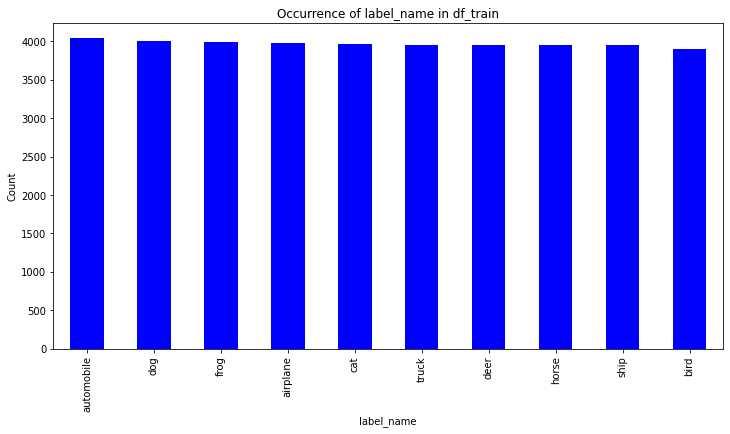

In [9]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_train['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_train')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [10]:
df_val

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
5,aeroplane_s_000029.jpeg,aeroplane_s_000029.png,aeroplane_s_000032.png,pekingese_s_001521.png,0,airplane
16,aeroplane_s_000121.jpeg,aeroplane_s_000121.png,aeroplane_s_000154.png,pekinese_s_001582.png,0,airplane
17,aeroplane_s_000154.jpeg,aeroplane_s_000154.png,aeroplane_s_000200.png,delivery_truck_s_001526.png,0,airplane
25,airbus_s_000023.jpeg,airbus_s_000023.png,airbus_s_000024.png,banana_boat_s_001924.png,0,airplane
28,airbus_s_000042.jpeg,airbus_s_000042.png,airbus_s_000052.png,trucking_rig_s_001242.png,0,airplane
...,...,...,...,...,...,...
49573,wrecker_s_002064.jpeg,wrecker_s_002064.png,wrecker_s_002067.png,grass_frog_s_000014.png,9,truck
49579,wrecker_s_002150.jpeg,wrecker_s_002150.png,wrecker_s_002156.png,attack_aircraft_s_000902.png,9,truck
49593,wrecker_s_002292.jpeg,wrecker_s_002292.png,wrecker_s_002294.png,puppy_s_000691.png,9,truck
49598,wrecker_s_002312.jpeg,wrecker_s_002312.png,wrecker_s_002318.png,freighter_s_001191.png,9,truck


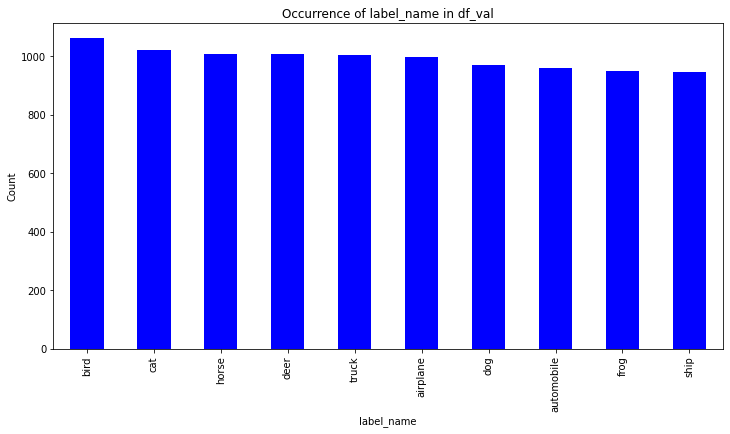

In [11]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_val['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_val')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [12]:
df_test

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
0,test-abandoned_ship_s_000213.jpeg,test-abandoned_ship_s_000213.png,test-abandoned_ship_s_000260.png,test-dama_dama_s_000300.png,8,ship
1,test-abandoned_ship_s_000260.jpeg,test-abandoned_ship_s_000260.png,test-abandoned_ship_s_000380.png,test-compact_car_s_001759.png,8,ship
2,test-abandoned_ship_s_000380.jpeg,test-abandoned_ship_s_000380.png,test-abandoned_ship_s_000635.png,test-mongrel_s_002015.png,8,ship
3,test-abandoned_ship_s_000635.jpeg,test-abandoned_ship_s_000635.png,test-abandoned_ship_s_000735.png,test-bufo_americanus_s_001561.png,8,ship
4,test-abandoned_ship_s_000735.jpeg,test-abandoned_ship_s_000735.png,test-abandoned_ship_s_001201.png,test-musk_deer_s_000006.png,8,ship
...,...,...,...,...,...,...
9639,test-wrecker_s_002227.jpeg,test-wrecker_s_002227.png,test-wrecker_s_002302.png,test-mule_deer_s_001693.png,9,truck
9640,test-wrecker_s_002302.jpeg,test-wrecker_s_002302.png,test-wrecker_s_002367.png,test-stealth_bomber_s_000756.png,9,truck
9641,test-yosemite_toad_s_000002.jpeg,test-yosemite_toad_s_000002.png,test-yosemite_toad_s_000015.png,test-maltese_s_000181.png,6,frog
9642,test-yosemite_toad_s_000015.jpeg,test-yosemite_toad_s_000015.png,test-yosemite_toad_s_000056.png,test-attack_aircraft_s_001009.png,6,frog


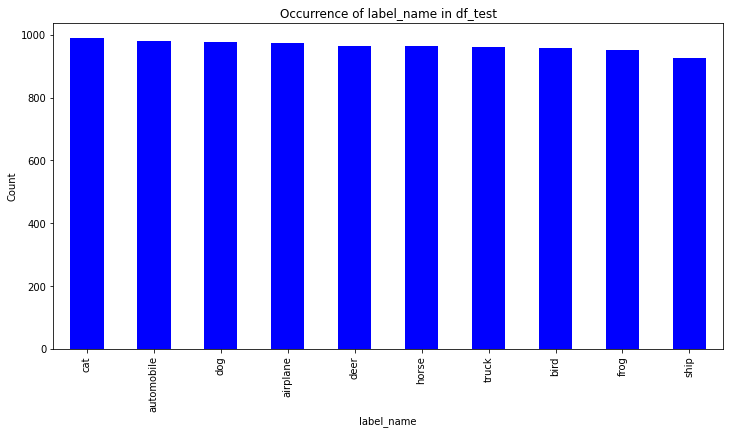

In [13]:
import matplotlib.pyplot as plt

# get the unique values and their count from the 'label_name' column
label_name_count = df_test['label_name'].value_counts()

# plot the bar graph
label_name_count.plot(kind='bar', x='label_name', y='count', color='blue', figsize=(12, 6))

# add title and labels to the graph
plt.title('Occurrence of label_name in df_test')
plt.xlabel('label_name')
plt.ylabel('Count')

# display the graph
plt.show()

In [14]:
import os
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.utils.data
from torchvision.datasets import ImageFolder
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import json
from torchvision.transforms import transforms
import torch.optim as optim
from tqdm.notebook import tqdm
import random

train_data = df_train
val_data = df_val
test_data = df_test
train_data_path = '/content/dataset/lensless_cifar10'
train_data_path2 = '/content/dataset/clean_cifar10'
test_data_path = '/content/dataset/lensless_cifar10'
test_data_path2 = '/content/dataset/clean_cifar10'

class LenslessTripletDataset():

    def __init__(self, df, path_lensless, path_clean, train=True, transform=None):
        self.data_csv = df
        self.is_train = train
        self.transform = transform
        self.path_lensless = path_lensless
        self.path_clean = path_clean
        if self.is_train:
            
            self.anchorimages = df.iloc[:, 0].values
            self.anchorlabels = df.iloc[:, 4].values
            self.positiveimages = df.iloc[:, 2].values
            self.negativeimages = df.iloc[:, 3].values
            self.index = df.index.values 

    def __len__(self):
        return len(self.anchorimages)

    def __getitem__(self, item):
        anchor_image_name = self.anchorimages[item]
        anchor_image_path = self.path_lensless + '/' + anchor_image_name
        anchor_img = Image.open(anchor_image_path).convert('RGB')

        positive_image_name = self.positiveimages[item]
        positive_image_path = self.path_clean + '/' + positive_image_name
        positive_img = Image.open(positive_image_path).convert('RGB')

        anchor_label = self.anchorlabels[item]

        negative_image_name = self.negativeimages[item]
        negative_image_path = self.path_clean + '/' + negative_image_name
        negative_img = Image.open(negative_image_path).convert('RGB')

        anchor_img = self.transform(anchor_img)
        positive_img = self.transform(positive_img)                   
        negative_img = self.transform(negative_img)

        return anchor_img, positive_img, negative_img, anchor_label

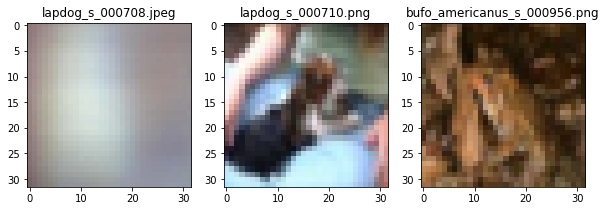

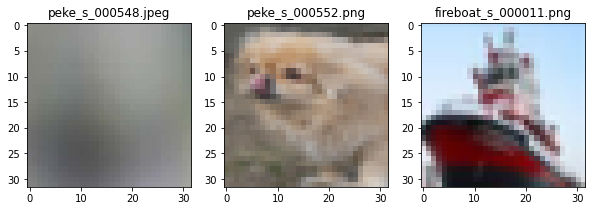

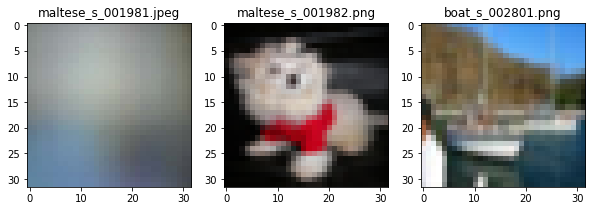

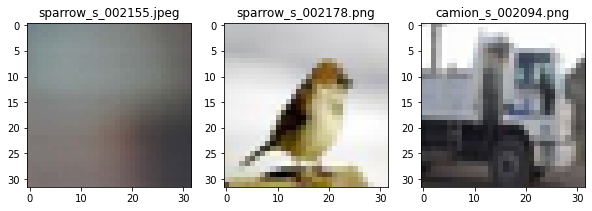

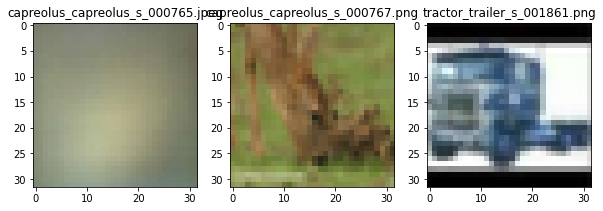

In [15]:
# Example data
df = df_train

# Example transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip()
])

# Create an instance of the LenslessTripletDataset class
dataset = LenslessTripletDataset(df, '/content/dataset/lensless_cifar10', '/content/dataset/clean_cifar10', True, transform)

# Access data using the instance
for i in range(5):
    anchor_img, positive_img, negative_img, anchor_label = dataset[i]
    anchor_img = anchor_img.permute(1, 2, 0)  # Change shape from (3, 32, 32) to (32, 32, 3)
    positive_img = positive_img.permute(1, 2, 0)
    negative_img = negative_img.permute(1, 2, 0)
    fig, ax = plt.subplots(1, 3, figsize=(10, 10))
    ax[0].imshow(anchor_img)
    ax[1].imshow(positive_img)
    ax[2].imshow(negative_img)
    ax[0].set_title(dataset.anchorimages[i])
    ax[1].set_title(dataset.positiveimages[i])
    ax[2].set_title(dataset.negativeimages[i])
    plt.show()

##Triplet loss function

In [16]:
class TripletLoss(nn.Module):
  def __init__(self, margin=0.005):
      super(TripletLoss, self).__init__()
      self.margin = margin
  def calc_euclidean(self, x1, x2):
      #return (torch.sqrt(torch.sum((x1 - x2) ** 2, dim=1)))
      return (x1 - x2).pow(2).sum(1)
  def forward(self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor) -> torch.Tensor:
      distance_positive = self.calc_euclidean(anchor, positive)
      distance_negative = self.calc_euclidean(anchor, negative)
      losses = torch.relu(distance_positive - distance_negative + self.margin)
      return losses.mean()

In [17]:
def get_default_device():
#””Pick GPU if available, else CPU”””
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
IMAGE_SIZE = 32
BATCH_SIZE = 64
DEVICE = get_default_device()
LEARNING_RATE = 0.001
EPOCHS = 50

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.RandomHorizontalFlip()
])

def get_train_dataset(IMAGE_SIZE=32):
    train_dataset = LenslessTripletDataset(train_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transform)
    return train_dataset

def get_val_dataset(IMAGE_SIZE=32):
    val_dataset = LenslessTripletDataset(val_data,path_lensless=train_data_path, path_clean=train_data_path2,train=True,transform=transform)
    return val_dataset

def get_test_dataset(IMAGE_SIZE=32):
    test_dataset = LenslessTripletDataset(test_data,path_lensless=test_data_path, path_clean=test_data_path2,train=True,transform=transform)
    return test_dataset

train_dataset = get_train_dataset(IMAGE_SIZE = IMAGE_SIZE)
val_dataset = get_val_dataset(IMAGE_SIZE = IMAGE_SIZE)
test_dataset = get_test_dataset(IMAGE_SIZE = IMAGE_SIZE)

train_dl = DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)
val_dl = DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)
test_dl = DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


##Convolutional Neural Network

In [18]:
###Classification Network

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc4 = nn.Linear(128 * 4 * 4, 512)
        self.relu4 = nn.ReLU(inplace=True)
        self.fc5 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim=1)  # Add a softmax layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)  # Apply the softmax function
        
        return x


In [19]:
# Define your training loop for classification
def train(model, train_dl, val_dl, loss_fn, optimizer, device):
    # Initialize empty lists to store the accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    model.train()
    best_val_acc = 0.0
    for epoch in tqdm(range(EPOCHS), desc="Epochs"):
        running_loss = []
        running_acc = []
        CROSS_ENTROPY_WEIGHT = 1
        for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(tqdm(train_dl, desc="Training", leave=False)):
            anchor_img = anchor_img.to(device)
            positive_img = positive_img.to(device)
            negative_img = negative_img.to(device)
            anchor_label = anchor_label.to(device)

            # Compute the output of the model
            anchor_output = model(anchor_img)
            positive_output = model(positive_img)
            negative_output = model(negative_img)

            # Compute the triplet loss
            triplet_loss = loss_fn(anchor_output, positive_output, negative_output)

            # Compute the cross-entropy loss
            cross_entropy_loss = nn.CrossEntropyLoss()(anchor_output, anchor_label)

            # Compute the overall loss as a weighted sum of the triplet loss and cross-entropy loss
            loss = triplet_loss + CROSS_ENTROPY_WEIGHT * cross_entropy_loss

            # Compute the accuracy
            preds = torch.argmax(anchor_output, dim=1)
            acc = (preds == anchor_label).float().mean()

            # Update the running loss and accuracy
            running_loss.append(loss.item())
            running_acc.append(acc.item())

            # Zero the gradients, compute the gradients, and update the parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute the average training loss and accuracy
        avg_loss = sum(running_loss) / len(running_loss)
        avg_acc = sum(running_acc) / len(running_acc)

        # Append the average training loss and accuracy to the respective lists
        train_loss.append(avg_loss)
        train_acc.append(avg_acc)

        # Compute the validation loss and accuracy
        eval_loss, eval_acc = evaluate(model, val_dl, loss_fn, device)

        # Append the validation loss and accuracy to the list
        val_loss.append(eval_loss)
        val_acc.append(eval_acc)

        # Print the training loss, validation loss, training accuracy, and validation accuracy
        print(f"Epoch {epoch+1}/{EPOCHS} - Training loss: {avg_loss:.4f}, Validation loss: {eval_loss:.4f}, Training accuracy: {avg_acc:.4f}, Validation accuracy: {eval_acc:.4f}")

        # Save the model with the best validation accuracy
        if eval_acc > best_val_acc:
            best_val_acc = eval_acc
            torch.save(model.state_dict(), 'best_weights.pt')
    
    print(f'Best Validation Acc: {best_val_acc:.4f}')
    return train_loss, train_acc, val_loss, val_acc


def evaluate(model, val_dl, loss_fn, device):
    model.eval()
    with torch.no_grad():
        running_loss = []
        running_acc = []
        cross_entropy_weight = 1

        for step, (anchor_img, positive_img, negative_img, anchor_label) in enumerate(tqdm(val_dl, desc="Evaluating", leave=False)):
            anchor_img = anchor_img.to(device)
            positive_img = positive_img.to(device)
            negative_img = negative_img.to(device)
            anchor_label = anchor_label.to(device)

            # Compute the output of the model
            anchor_output = model(anchor_img)
            positive_output = model(positive_img)
            negative_output = model(negative_img)

            # Compute the triplet loss
            triplet_loss = loss_fn(anchor_output, positive_output, negative_output)

            # Compute the cross-entropy loss
            cross_entropy_loss = nn.CrossEntropyLoss()(anchor_output, anchor_label)

            # Compute the overall loss as a weighted sum of the triplet loss and cross-entropy loss
            loss = triplet_loss + cross_entropy_weight * cross_entropy_loss

            # Compute the accuracy
            preds = torch.argmax(anchor_output, dim=1)
            acc = (preds == anchor_label).float().mean()

            # Update the running loss and accuracy
            running_loss.append(loss.item())
            running_acc.append(acc.item())

        # Compute the average loss and accuracy
        avg_loss = sum(running_loss) / len(running_loss)
        avg_acc = sum(running_acc) / len(running_acc)

    return avg_loss, avg_acc



In [20]:
device = torch.device("cuda")
model = Network().to(device)
Optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = TripletLoss()

##Model training

In [25]:
# Define your training loop for classification
train_loss, train_acc, val_los, val_ac = train(model, train_dl, val_dl, loss_fn, Optimizer, device)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 1/50 - Training loss: 2.2842, Validation loss: 2.2591, Training accuracy: 0.1478, Validation accuracy: 0.1779


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 2/50 - Training loss: 2.2602, Validation loss: 2.2493, Training accuracy: 0.1807, Validation accuracy: 0.1917


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 3/50 - Training loss: 2.2448, Validation loss: 2.2459, Training accuracy: 0.2004, Validation accuracy: 0.1959


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 4/50 - Training loss: 2.2314, Validation loss: 2.2323, Training accuracy: 0.2169, Validation accuracy: 0.2150


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 5/50 - Training loss: 2.2178, Validation loss: 2.2029, Training accuracy: 0.2332, Validation accuracy: 0.2509


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 6/50 - Training loss: 2.2070, Validation loss: 2.1928, Training accuracy: 0.2446, Validation accuracy: 0.2586


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 7/50 - Training loss: 2.1985, Validation loss: 2.1853, Training accuracy: 0.2532, Validation accuracy: 0.2687


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 8/50 - Training loss: 2.1892, Validation loss: 2.1851, Training accuracy: 0.2650, Validation accuracy: 0.2695


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 9/50 - Training loss: 2.1828, Validation loss: 2.1777, Training accuracy: 0.2712, Validation accuracy: 0.2775


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 10/50 - Training loss: 2.1773, Validation loss: 2.1763, Training accuracy: 0.2776, Validation accuracy: 0.2762


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 11/50 - Training loss: 2.1686, Validation loss: 2.1668, Training accuracy: 0.2865, Validation accuracy: 0.2877


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 12/50 - Training loss: 2.1642, Validation loss: 2.1639, Training accuracy: 0.2908, Validation accuracy: 0.2881


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 13/50 - Training loss: 2.1540, Validation loss: 2.1606, Training accuracy: 0.3026, Validation accuracy: 0.2928


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 14/50 - Training loss: 2.1494, Validation loss: 2.1599, Training accuracy: 0.3071, Validation accuracy: 0.2948


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 15/50 - Training loss: 2.1459, Validation loss: 2.1761, Training accuracy: 0.3119, Validation accuracy: 0.2777


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 16/50 - Training loss: 2.1395, Validation loss: 2.1629, Training accuracy: 0.3174, Validation accuracy: 0.2908


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 17/50 - Training loss: 2.1363, Validation loss: 2.1641, Training accuracy: 0.3217, Validation accuracy: 0.2890


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 18/50 - Training loss: 2.1322, Validation loss: 2.1659, Training accuracy: 0.3246, Validation accuracy: 0.2846


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 19/50 - Training loss: 2.1264, Validation loss: 2.1534, Training accuracy: 0.3320, Validation accuracy: 0.3022


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 20/50 - Training loss: 2.1240, Validation loss: 2.1427, Training accuracy: 0.3336, Validation accuracy: 0.3130


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 21/50 - Training loss: 2.1181, Validation loss: 2.1428, Training accuracy: 0.3401, Validation accuracy: 0.3141


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 22/50 - Training loss: 2.1151, Validation loss: 2.1466, Training accuracy: 0.3433, Validation accuracy: 0.3073


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 23/50 - Training loss: 2.1141, Validation loss: 2.1440, Training accuracy: 0.3431, Validation accuracy: 0.3120


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 24/50 - Training loss: 2.1084, Validation loss: 2.1349, Training accuracy: 0.3513, Validation accuracy: 0.3226


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 25/50 - Training loss: 2.1076, Validation loss: 2.1389, Training accuracy: 0.3510, Validation accuracy: 0.3177


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 26/50 - Training loss: 2.1007, Validation loss: 2.1413, Training accuracy: 0.3581, Validation accuracy: 0.3137


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 27/50 - Training loss: 2.0981, Validation loss: 2.1380, Training accuracy: 0.3615, Validation accuracy: 0.3176


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 28/50 - Training loss: 2.0970, Validation loss: 2.1281, Training accuracy: 0.3606, Validation accuracy: 0.3281


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 29/50 - Training loss: 2.0915, Validation loss: 2.1259, Training accuracy: 0.3678, Validation accuracy: 0.3315


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 30/50 - Training loss: 2.0895, Validation loss: 2.1283, Training accuracy: 0.3710, Validation accuracy: 0.3254


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 31/50 - Training loss: 2.0872, Validation loss: 2.1529, Training accuracy: 0.3725, Validation accuracy: 0.3028


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 32/50 - Training loss: 2.0858, Validation loss: 2.1304, Training accuracy: 0.3742, Validation accuracy: 0.3276


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 33/50 - Training loss: 2.0771, Validation loss: 2.1263, Training accuracy: 0.3846, Validation accuracy: 0.3296


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 34/50 - Training loss: 2.0765, Validation loss: 2.1389, Training accuracy: 0.3839, Validation accuracy: 0.3177


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 35/50 - Training loss: 2.0769, Validation loss: 2.1376, Training accuracy: 0.3824, Validation accuracy: 0.3186


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 36/50 - Training loss: 2.0766, Validation loss: 2.1287, Training accuracy: 0.3829, Validation accuracy: 0.3279


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 37/50 - Training loss: 2.0749, Validation loss: 2.1476, Training accuracy: 0.3849, Validation accuracy: 0.3081


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 38/50 - Training loss: 2.0679, Validation loss: 2.1351, Training accuracy: 0.3924, Validation accuracy: 0.3224


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 39/50 - Training loss: 2.0624, Validation loss: 2.1198, Training accuracy: 0.3991, Validation accuracy: 0.3383


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 40/50 - Training loss: 2.0625, Validation loss: 2.1342, Training accuracy: 0.3982, Validation accuracy: 0.3254


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 41/50 - Training loss: 2.0638, Validation loss: 2.1356, Training accuracy: 0.3974, Validation accuracy: 0.3197


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 42/50 - Training loss: 2.0598, Validation loss: 2.1297, Training accuracy: 0.4014, Validation accuracy: 0.3294


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 43/50 - Training loss: 2.0579, Validation loss: 2.1326, Training accuracy: 0.4026, Validation accuracy: 0.3231


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 44/50 - Training loss: 2.0550, Validation loss: 2.1234, Training accuracy: 0.4064, Validation accuracy: 0.3362


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 45/50 - Training loss: 2.0561, Validation loss: 2.1291, Training accuracy: 0.4041, Validation accuracy: 0.3287


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 46/50 - Training loss: 2.0520, Validation loss: 2.1253, Training accuracy: 0.4092, Validation accuracy: 0.3333


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 47/50 - Training loss: 2.0502, Validation loss: 2.1378, Training accuracy: 0.4098, Validation accuracy: 0.3191


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 48/50 - Training loss: 2.0472, Validation loss: 2.1322, Training accuracy: 0.4138, Validation accuracy: 0.3256


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 49/50 - Training loss: 2.0474, Validation loss: 2.1252, Training accuracy: 0.4130, Validation accuracy: 0.3345


Training:   0%|          | 0/621 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/156 [00:00<?, ?it/s]

Epoch 50/50 - Training loss: 2.0415, Validation loss: 2.1219, Training accuracy: 0.4202, Validation accuracy: 0.3378
Best Validation Acc: 0.3383


##50 Epochs

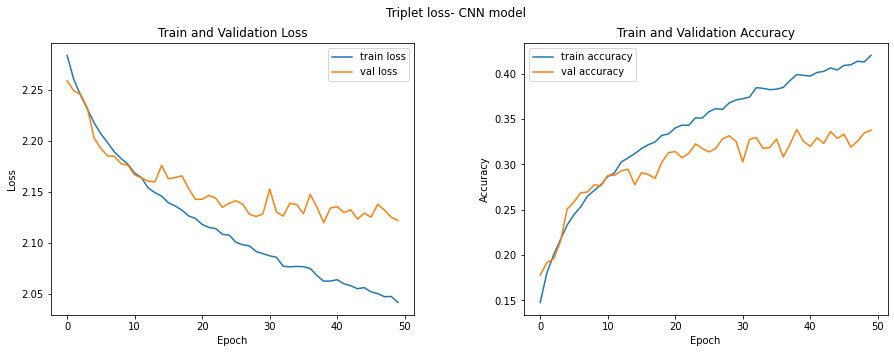

In [26]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

# Plot the train and val loss in the first subplot
axs[0].plot(train_loss, label='train loss')
axs[0].plot(val_los, label='val loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Train and Validation Loss')

# Plot the train and val accuracy in the second subplot
axs[1].plot(train_acc, label='train accuracy')
axs[1].plot(val_ac, label='val accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Train and Validation Accuracy')

# Add the main title
fig.suptitle('Triplet loss- CNN model')

# Save the plot with higher DPI
plt.savefig('TripletLoss_Len.jpeg', dpi=300)

##30 Epochs

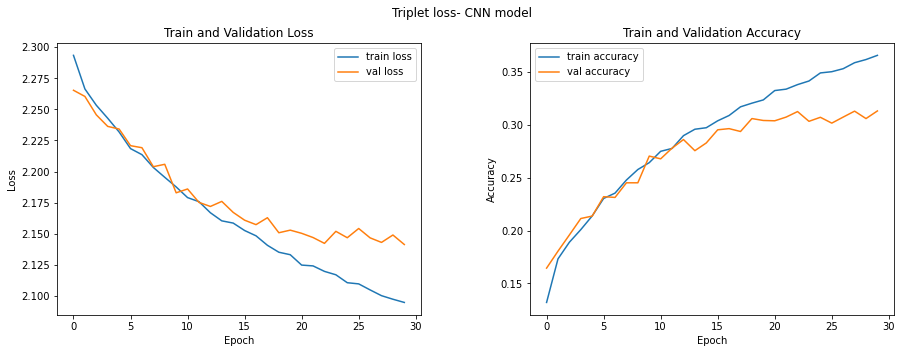

In [ ]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

# Plot the train and val loss in the first subplot
axs[0].plot(train_loss, label='train loss')
axs[0].plot(val_los, label='val loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Train and Validation Loss')

# Plot the train and val accuracy in the second subplot
axs[1].plot(train_acc, label='train accuracy')
axs[1].plot(val_ac, label='val accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Train and Validation Accuracy')

# Add the main title
fig.suptitle('Triplet loss- CNN model')

# Save the plot with higher DPI
plt.savefig('TripletLoss_Len.jpeg', dpi=300)

In [21]:
df_test = df_test.sample(frac = 1)

In [22]:
df_test

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
1634,test-bufo_viridis_s_000582.jpeg,test-bufo_viridis_s_000582.png,test-bufo_viridis_s_000584.png,test-aerial_ladder_truck_s_001218.png,6,frog
7605,test-shooting_brake_s_000692.jpeg,test-shooting_brake_s_000692.png,test-shooting_brake_s_000714.png,test-jetliner_s_000053.png,1,automobile
735,test-attack_aircraft_s_001548.jpeg,test-attack_aircraft_s_001548.png,test-attack_aircraft_s_001587.png,test-muntjac_s_000331.png,0,airplane
7520,test-seaplane_s_000934.jpeg,test-seaplane_s_000934.png,test-seaplane_s_000978.png,test-true_cat_s_001892.png,0,airplane
8742,test-texas_toad_s_000054.jpeg,test-texas_toad_s_000054.png,test-texas_toad_s_000110.png,test-emu_s_000384.png,6,frog
...,...,...,...,...,...,...
5950,test-muntjac_s_000559.jpeg,test-muntjac_s_000559.png,test-muntjac_s_000562.png,test-dive_bomber_s_000552.png,4,deer
5916,test-multiengine_airplane_s_000331.jpeg,test-multiengine_airplane_s_000331.png,test-multiengine_airplane_s_000344.png,test-bullfrog_s_001743.png,0,airplane
7476,test-scow_s_000426.jpeg,test-scow_s_000426.png,test-scow_s_000809.png,test-tomcat_s_001466.png,8,ship
2779,test-coupe_s_001377.jpeg,test-coupe_s_001377.png,test-coupe_s_001388.png,test-racing_boat_s_000614.png,1,automobile


In [23]:
import pandas as pd
import numpy as np

# Load the dataframe
df = df_test

# Define the number of images to select from each class
num_images_per_class = 50

# Group the dataframe by the label column
grouped = df.groupby('label')

# Initialize an empty list to store the selected rows
selected_rows = []

# Loop over each label group
for label, group in grouped:

    # Check if there are at least 50 rows in the group
    if len(group) >= num_images_per_class:
        # If there are, randomly select 50 rows
        selected = group.sample(n=num_images_per_class, random_state=42)
    else:
        # If there are fewer than 50 rows, select all of them
        selected = group

    # Append the selected rows to the list
    selected_rows.append(selected)

# Concatenate the selected rows into a single dataframe
selected_data = pd.concat(selected_rows)

# Print the selected rows
selected_data

,archor_img,postive_img,close_positive_img,negative_img,label,label_name
7284,test-reconnaissance_plane_s_000356.jpeg,test-reconnaissance_plane_s_000356.png,test-reconnaissance_plane_s_000357.png,test-blenheim_spaniel_s_000943.png,0,airplane
8058,test-stealth_bomber_s_001471.jpeg,test-stealth_bomber_s_001471.png,test-stealth_bomber_s_001487.png,test-estate_car_s_001066.png,0,airplane
434,test-amphibious_aircraft_s_001336.jpeg,test-amphibious_aircraft_s_001336.png,test-amphibious_aircraft_s_001466.png,test-tabby_cat_s_002238.png,0,airplane
7527,test-seaplane_s_001950.jpeg,test-seaplane_s_001950.png,test-seaplane_s_001953.png,test-domestic_cat_s_001722.png,0,airplane
127,test-airbus_s_001191.jpeg,test-airbus_s_001191.png,test-airbus_s_001232.png,test-truck_s_000585.png,0,airplane
...,...,...,...,...,...,...
9174,test-truck_s_000879.jpeg,test-truck_s_000879.png,test-truck_s_000884.png,test-gelding_s_001307.png,9,truck
3030,test-delivery_van_s_000100.jpeg,test-delivery_van_s_000100.png,test-delivery_van_s_000110.png,test-stealth_fighter_s_001509.png,9,truck
69,test-aerial_ladder_truck_s_000865.jpeg,test-aerial_ladder_truck_s_000865.png,test-aerial_ladder_truck_s_001042.png,test-puppy_s_000354.png,9,truck
4987,test-laundry_truck_s_000318.jpeg,test-laundry_truck_s_000318.png,test-laundry_truck_s_000332.png,test-dog_s_000732.png,9,truck


In [24]:
def get_selected_dataset(IMAGE_SIZE=32):
    selected_dataset = LenslessTripletDataset(selected_data,path_lensless=test_data_path, path_clean=test_data_path2,train=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),transforms.RandomHorizontalFlip(p = 0.2), transforms.RandomVerticalFlip(p=0.8),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]))
    return selected_dataset

selected_dataset = get_selected_dataset(IMAGE_SIZE = IMAGE_SIZE)

selected_dl = DataLoader(selected_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=4,pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Generating embeddings:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


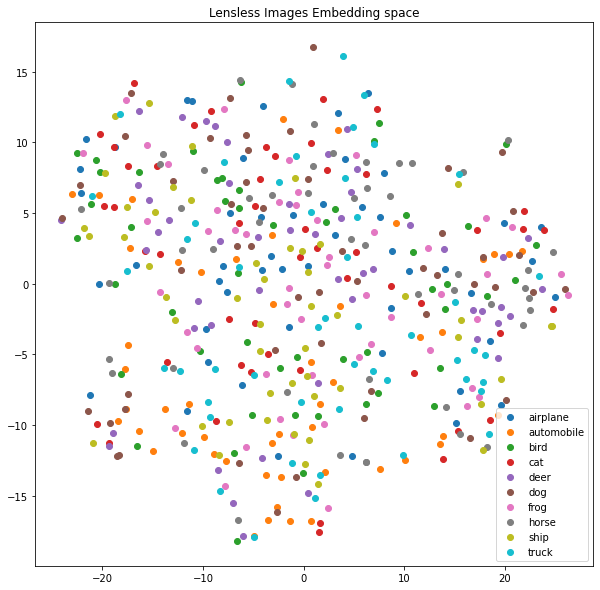

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Generate embeddings for the test set
test_embeddings = []
test_labels = []
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
with torch.no_grad():
    for step, (test_img, positive_img, negative_img, test_label) in enumerate(tqdm(selected_dl, desc="Generating embeddings", leave=False)):
        test_img = test_img.to(device)
        test_label = test_label.to(device)

        # Flatten the test image tensors
        test_img = test_img.view(test_img.size(0), -1)

        # Append the flattened embeddings and labels to the respective lists
        test_embeddings.append(test_img.cpu().numpy())
        test_labels.append(test_label.cpu().numpy())

# Concatenate the embeddings and labels to form arrays
test_embeddings = np.concatenate(test_embeddings)
test_labels = np.concatenate(test_labels)

# Use t-SNE algorithm to reduce the dimensions of the embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
test_embeddings_2d = tsne.fit_transform(test_embeddings)

# Visualize the embeddings in a 2D plot
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(test_labels)):
    plt.scatter(test_embeddings_2d[test_labels == label, 0], test_embeddings_2d[test_labels == label, 1], label=class_names[label])
plt.legend()

# Add the main title
plt.title('Lensless Images Embedding space')
# Save the plot with higher DPI
plt.savefig('Lensless Embedding space Lensless.jpeg', dpi=300)


Generating embeddings:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


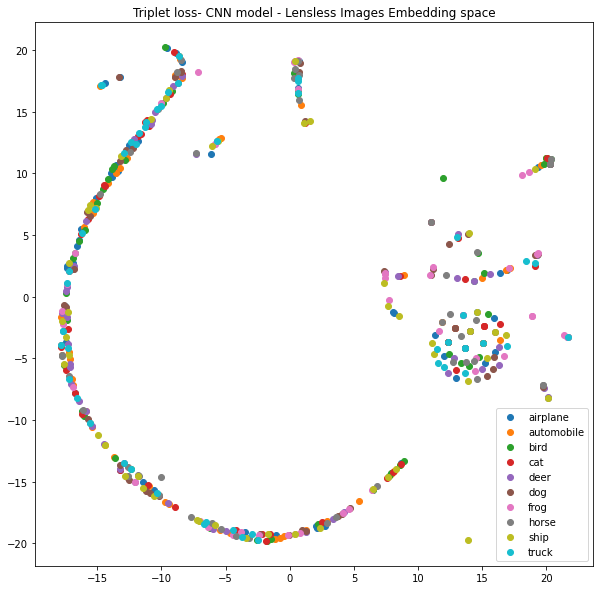

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Create a list of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load the saved model
model.load_state_dict(torch.load('best_weights.pt'))
model.eval()

# Generate embeddings for the test set
test_embeddings = []
test_labels = []
with torch.no_grad():
    for step, (test_img, positive_img, negative_img, test_label) in enumerate(tqdm(selected_dl, desc="Generating embeddings", leave=False)):
        test_img = test_img.to(device)
        test_label = test_label.to(device)

        # Compute the output of the model
        test_output = model(test_img)

        # Append the embeddings and labels to the respective lists
        test_embeddings.append(test_output.cpu().numpy())
        test_labels.append(test_label.cpu().numpy())

# Concatenate the embeddings and labels to form arrays
test_embeddings = np.concatenate(test_embeddings)
test_labels = np.concatenate(test_labels)

# Use t-SNE algorithm to reduce the dimensions of the embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
test_embeddings_2d = tsne.fit_transform(test_embeddings)

# Visualize the embeddings in a 2D plot
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(test_labels)):
    plt.scatter(test_embeddings_2d[test_labels == label, 0], test_embeddings_2d[test_labels == label, 1], label=class_names[label])
plt.legend()
# Add the main title
plt.title('Triplet loss- CNN model - Lensless Images Embedding space')
# Save the plot with higher DPI
plt.savefig('Triplet loss- CNN model Lensless Images Embedding space.jpeg', dpi=300)

In [23]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image

# 1. Define the preprocessing steps for the input image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE))
])

# 2. Load the saved weights into the model
model = Network()
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/best_weights_tripletloss_lensless_50.pt'))

# 3. Move the model to the appropriate device (CPU or GPU)
model.to(device)

# 4. Set the model to evaluation mode
model.eval()

# 5. Load a list of image names
image_names = (df_test['archor_img'].tolist())

# 6. Loop over the image names and make predictions
results = []
results_encode = []
for image_name in image_names:
    # 7. Open the image and preprocess it
    img_path = os.path.join('/content/dataset/lensless_cifar10', image_name)
    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    # 8. Use the model to make a prediction
    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)

    # 9. Store the predicted class
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    pred_class = class_names[pred.item()]
    results.append(pred_class)
    results_encode.append(pred.item())

# 10. Print the results
ground_truth = (df_test['label_name'].tolist())
ground_truth_encode = (df_test['label'].tolist())
print("Predicted classes:", results)
print("Ground truth:", ground_truth)
print("Predicted classes encode:", results_encode)
print("Label encode:",ground_truth_encode )

Predicted classes: ['ship', 'automobile', 'truck', 'airplane', 'frog', 'truck', 'cat', 'bird', 'bird', 'automobile', 'truck', 'frog', 'bird', 'dog', 'ship', 'truck', 'automobile', 'dog', 'deer', 'airplane', 'truck', 'frog', 'cat', 'airplane', 'bird', 'deer', 'frog', 'frog', 'deer', 'automobile', 'truck', 'deer', 'cat', 'bird', 'bird', 'dog', 'truck', 'automobile', 'frog', 'horse', 'airplane', 'truck', 'airplane', 'dog', 'dog', 'ship', 'ship', 'ship', 'deer', 'deer', 'deer', 'frog', 'dog', 'cat', 'airplane', 'horse', 'automobile', 'frog', 'bird', 'frog', 'truck', 'ship', 'airplane', 'frog', 'frog', 'airplane', 'deer', 'deer', 'airplane', 'airplane', 'frog', 'bird', 'dog', 'airplane', 'automobile', 'deer', 'frog', 'frog', 'bird', 'automobile', 'truck', 'horse', 'cat', 'frog', 'deer', 'ship', 'cat', 'ship', 'airplane', 'automobile', 'ship', 'ship', 'bird', 'ship', 'airplane', 'frog', 'ship', 'deer', 'airplane', 'automobile', 'frog', 'truck', 'frog', 'deer', 'deer', 'cat', 'automobile', 'a

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy
accuracy = accuracy_score(ground_truth, results)

# Calculate the precision
precision = precision_score(ground_truth, results, average='weighted')

# Calculate the recall
recall = recall_score(ground_truth, results, average='weighted')

# Calculate the F1-score
f1 = f1_score(ground_truth, results, average='weighted')

# Convert to percentages and round to two decimal places
accuracy = '{:.2%}'.format(accuracy)
precision = '{:.2%}'.format(precision)
recall = '{:.2%}'.format(recall)
f1 = '{:.2%}'.format(f1)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 31.13%
Precision: 31.16%
Recall: 31.13%
F1-score: 30.62%


In [ ]:
%cd /content/drive/MyDrive/Model

/content/drive/MyDrive/Model


In [ ]:
# Example code to save a PyTorch model
torch.save(model.state_dict(), 'best_weights.pt')

In [31]:
from numpy import random
import matplotlib.pyplot as plt

# calculate the prior probabilities
x = random.uniform(size=(1, 10))
prior_probs = x[0]


# calculate the likelihood probabilities
predicted_labels = results_encode
histogram, bins = np.histogram(predicted_labels, bins=range(11))
likelihood_probs = histogram / len(predicted_labels)

# calculate the posterior probabilities
posterior_probs = likelihood_probs * prior_probs

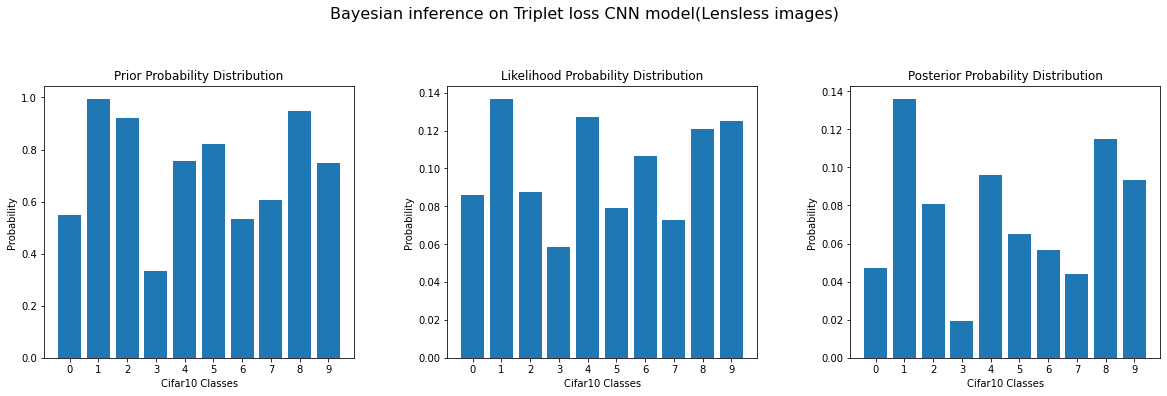

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

# Add main title
fig.suptitle('Bayesian inference on Triplet loss CNN model(Lensless images)', fontsize=16, y=1.1)

# Plot the train and val loss in the first subplot
axs[0].bar(range(10), prior_probs)
axs[0].set_title('Prior Probability Distribution')
axs[0].set_xlabel('Cifar10 Classes')
axs[0].set_ylabel('Probability')
axs[0].set_xticks(range(10))
axs[0].set_xticklabels(range(10))

axs[1].bar(range(10), likelihood_probs)
axs[1].set_title('Likelihood Probability Distribution')
axs[1].set_xlabel('Cifar10 Classes')
axs[1].set_ylabel('Probability')
axs[1].set_xticks(range(10))
axs[1].set_xticklabels(range(10))

axs[2].bar(range(10), posterior_probs)
axs[2].set_title('Posterior Probability Distribution')
axs[2].set_xlabel('Cifar10 Classes')
axs[2].set_ylabel('Probability')
axs[2].set_xticks(range(10))
axs[2].set_xticklabels(range(10))

plt.savefig('Bayesian inference on Triplet loss CNN model(Lensless images).jpeg', bbox_inches='tight')

In [33]:
q = posterior_probs
q = q.tolist()

In [34]:
pg = [0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [35]:
from scipy.special import rel_entr

#calculate (P || Q)
print("KL divergence:",sum(rel_entr(pg, q)),'nats')


KL divergence: 0.4077127916009669 nats
